# MILESTONE 1

1. Use the PRS dataset to create a dataframe

In [1]:
import pandas as pd
import requests
import bs4
df = pd.read_csv("Final.csv")

2. Check the description of the dataframe

In [2]:
df.describe

<bound method NDFrame.describe of          CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Regi

3. Check the shape of the dataframe

In [3]:
df.shape

(1101925, 16)

4. Check the data frame informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

5. Check for the Null values in the dataframe

In [5]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

6. Replace all the null values with "NaN"

In [6]:
df.fillna('NaN', inplace=True)

7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [7]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])

8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [8]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])

9. Sanity check - Check how many records are having order date greater than the delivery date

In [9]:
df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0]

27142

10. Remove those records where order date is greater than the delivery date

In [10]:
if df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0] == 0:
    print('NO Records found...')
else:
    print('Records found... where order creation date is more than requested delivery date')

Records found... where order creation date is more than requested delivery date


In [11]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
df.shape

(1074783, 16)

11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [12]:
df[df['ORDER_AMOUNT'].str.contains('-')].shape[0]

32

12. Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [13]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\1998918387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')


13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [14]:
df[df['ORDER_AMOUNT'].str.contains(',')].shape[0]

1073406

14. Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [15]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\1582582785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')


15. Count the number of records where the order date and the delivery date are same

In [16]:
df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']].shape[0]

100437

16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [17]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [18]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
exchange_rates = {
    'USD':1,                                                     
    'EUR': 1.08,   
    'AUD': 0.65,    
    'CAD': 0.74,    
    'GBP': 1.24,    
    'MYR': 0.22,    
    'PLN': 0.24,    
    'AED': 0.27,   
    'HKD': 0.13,     
    'CHF': 1.11,     
    'RON': 0.22,     
    'SGD': 0.74,     
    'CZK': 0.045,     
    'HU1': 0.0029,     
    'NZD': 0.61,       
    'BHD': 2.65,      
    'SAR': 0.27,       
    'QAR': 0.27,       
    'KWD': 3.25,       
    'SEK': 0.094
}
df['amount_in_usd'] = df['ORDER_AMOUNT'] * df['ORDER_CURRENCY'].map(exchange_rates)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\2343038568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\2343038568.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_in_usd'] = df['ORDER_AMOUNT'] * df['ORDER_CURRENCY'].map(exchange_rates)


18. Check for values “0” in the “'amount_in_usd” column. 

In [19]:
df[df['amount_in_usd'] == '0'].shape[0]

0

19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [20]:
df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\930833379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']


In [21]:
df.to_csv("FinalNew.csv", index=False)

# MILESTONE 2 

1. Create a Histogram on DISTRIBUTION_CHANNEL

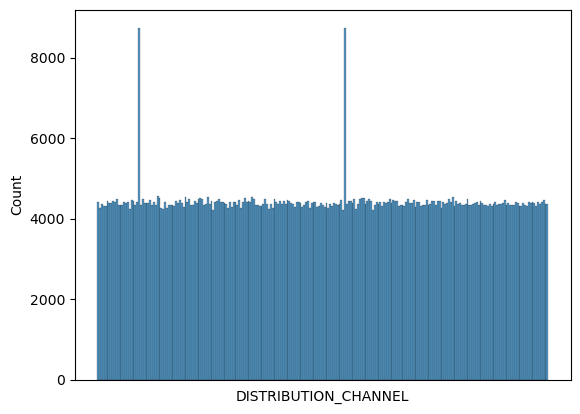

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

2. Create a Pie Chart on ORDER_CURRENCY

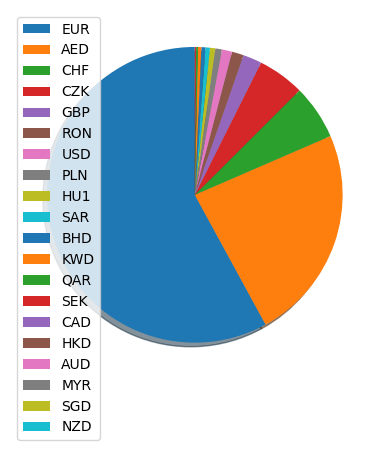

In [23]:
plt.pie(df['ORDER_CURRENCY'].value_counts(), shadow=True, startangle=90)
plt.legend(df['ORDER_CURRENCY'].unique(), loc='upper left')
plt.show()

3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

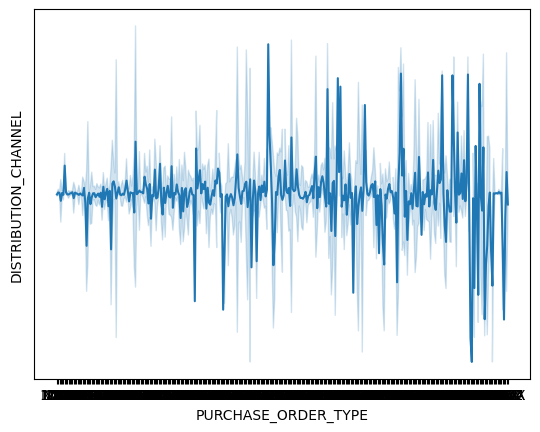

In [24]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.yticks([])
plt.show()

4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

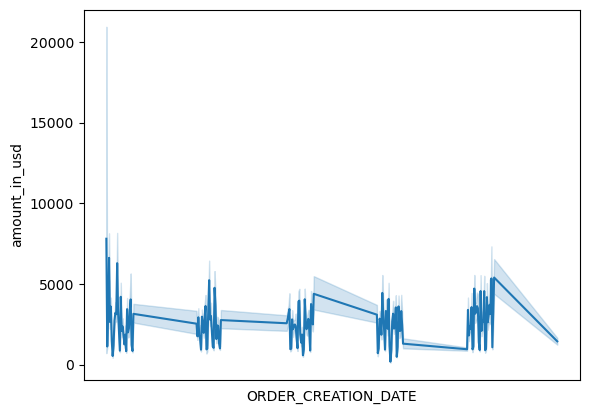

In [25]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['amount_in_usd'], data=df)
plt.show()

5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16020\301187307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')


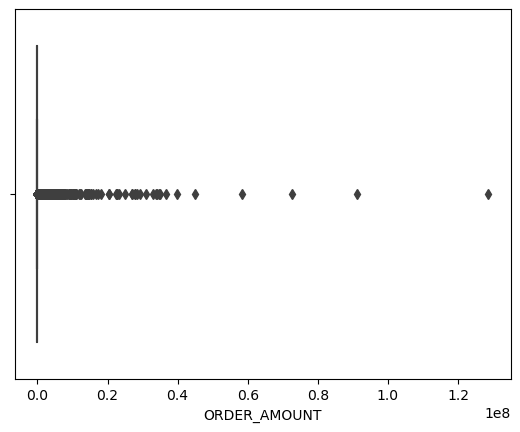

In [26]:
print(df['ORDER_AMOUNT'].dtype)
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

sns.boxplot(x=df['ORDER_AMOUNT'], data=df)
plt.show()


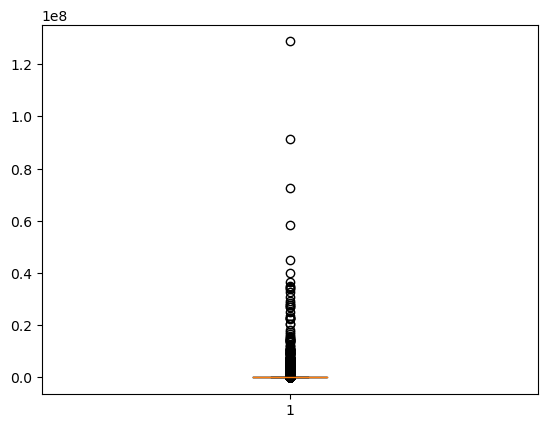

In [27]:
plt.boxplot(df['ORDER_AMOUNT'])
plt.show()

6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

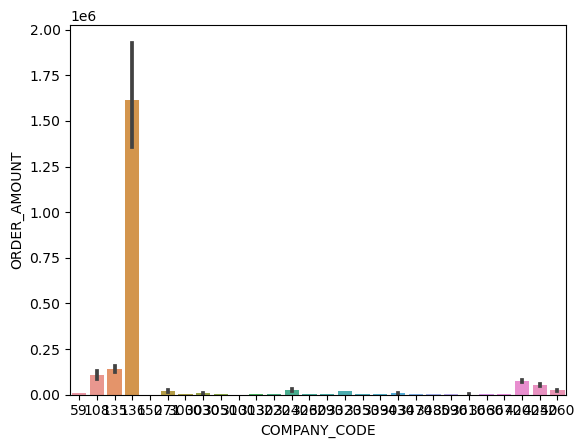

In [28]:
df = df.sort_values(by=['ORDER_AMOUNT'], ascending=False)
sns.barplot(x=df['COMPANY_CODE'], y=df['ORDER_AMOUNT'], data=df)
plt.show()

# MILESTONE 3

1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

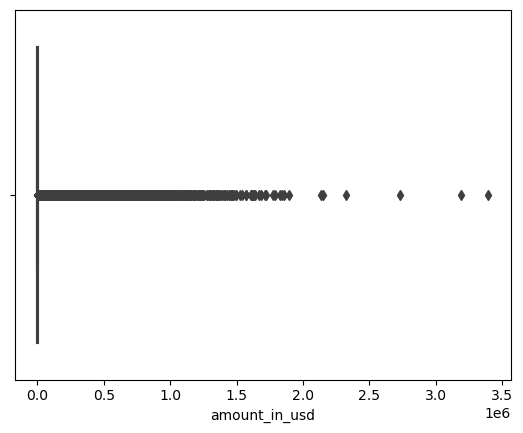

In [29]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['amount_in_usd'])
median = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].mask(df['amount_in_usd'] > 2000000, median)   #Used median to replace the outliers

2. Label encoding or One hot Encoding on all the categorical columns 

In [30]:
categorical = []   # List to store categorical column names
continuous = []     # List to store continuous column names

# Iterating over each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':   # Checking if the column's data type is 'object', if it is object
        categorical.append(col)   # adding the column name to the categorical list
    else:
        continuous.append(col)      # if not, adding the column name to the continuous list


In [31]:
le = LabelEncoder()    # Creating an instance of LabelEncoder

# Iterating over each categorical column
for col in categorical:
    df[col] = df[col].astype(str)                  # here, converting float values to string
    df[col] = le.fit_transform(df[col])             # Encoding the categorical values

3. Log Transformations on continuous columns 

In [32]:
import datetime

# Iterating over each continuous column
for col in continuous:                              
    if df[col].dtype == 'datetime64[ns]':                     # if the column's data type is datetime
        df[col] = df[col].apply(lambda x: x.timestamp())          # Converting datetime to timestamp
    df[col] = df[col].apply(lambda x: np.log(x))             # Applying natural logarithm to the values in continous coloums


4. Try to extract new features by grouping existing columns 

In [33]:
grouped_df = df.groupby('SALES_ORG').agg({                          # Grouped the DataFrame by 'SALES_ORG'
                'ORDER_AMOUNT': ['mean'],
                'RELEASED_CREDIT_VALUE': ['sum'],
                'CUSTOMER_NUMBER': ['nunique'],
                'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']
grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,7.649693,NaN,609429,141,12.915910
1,7.650169,NaN,723167,129,11.876058
2,7.650645,NaN,594668,116,12.157586
3,7.651120,NaN,667986,124,11.312470
4,7.651596,NaN,806552,137,12.091408
...,...,...,...,...,...
2406,8.413165,NaN,613023,143,13.351494
2407,8.413387,NaN,620833,122,11.434042
2408,8.413609,NaN,775251,139,12.895616
2409,8.413831,NaN,487248,146,12.903740


5. Create a heatmap to find correlation between the columns

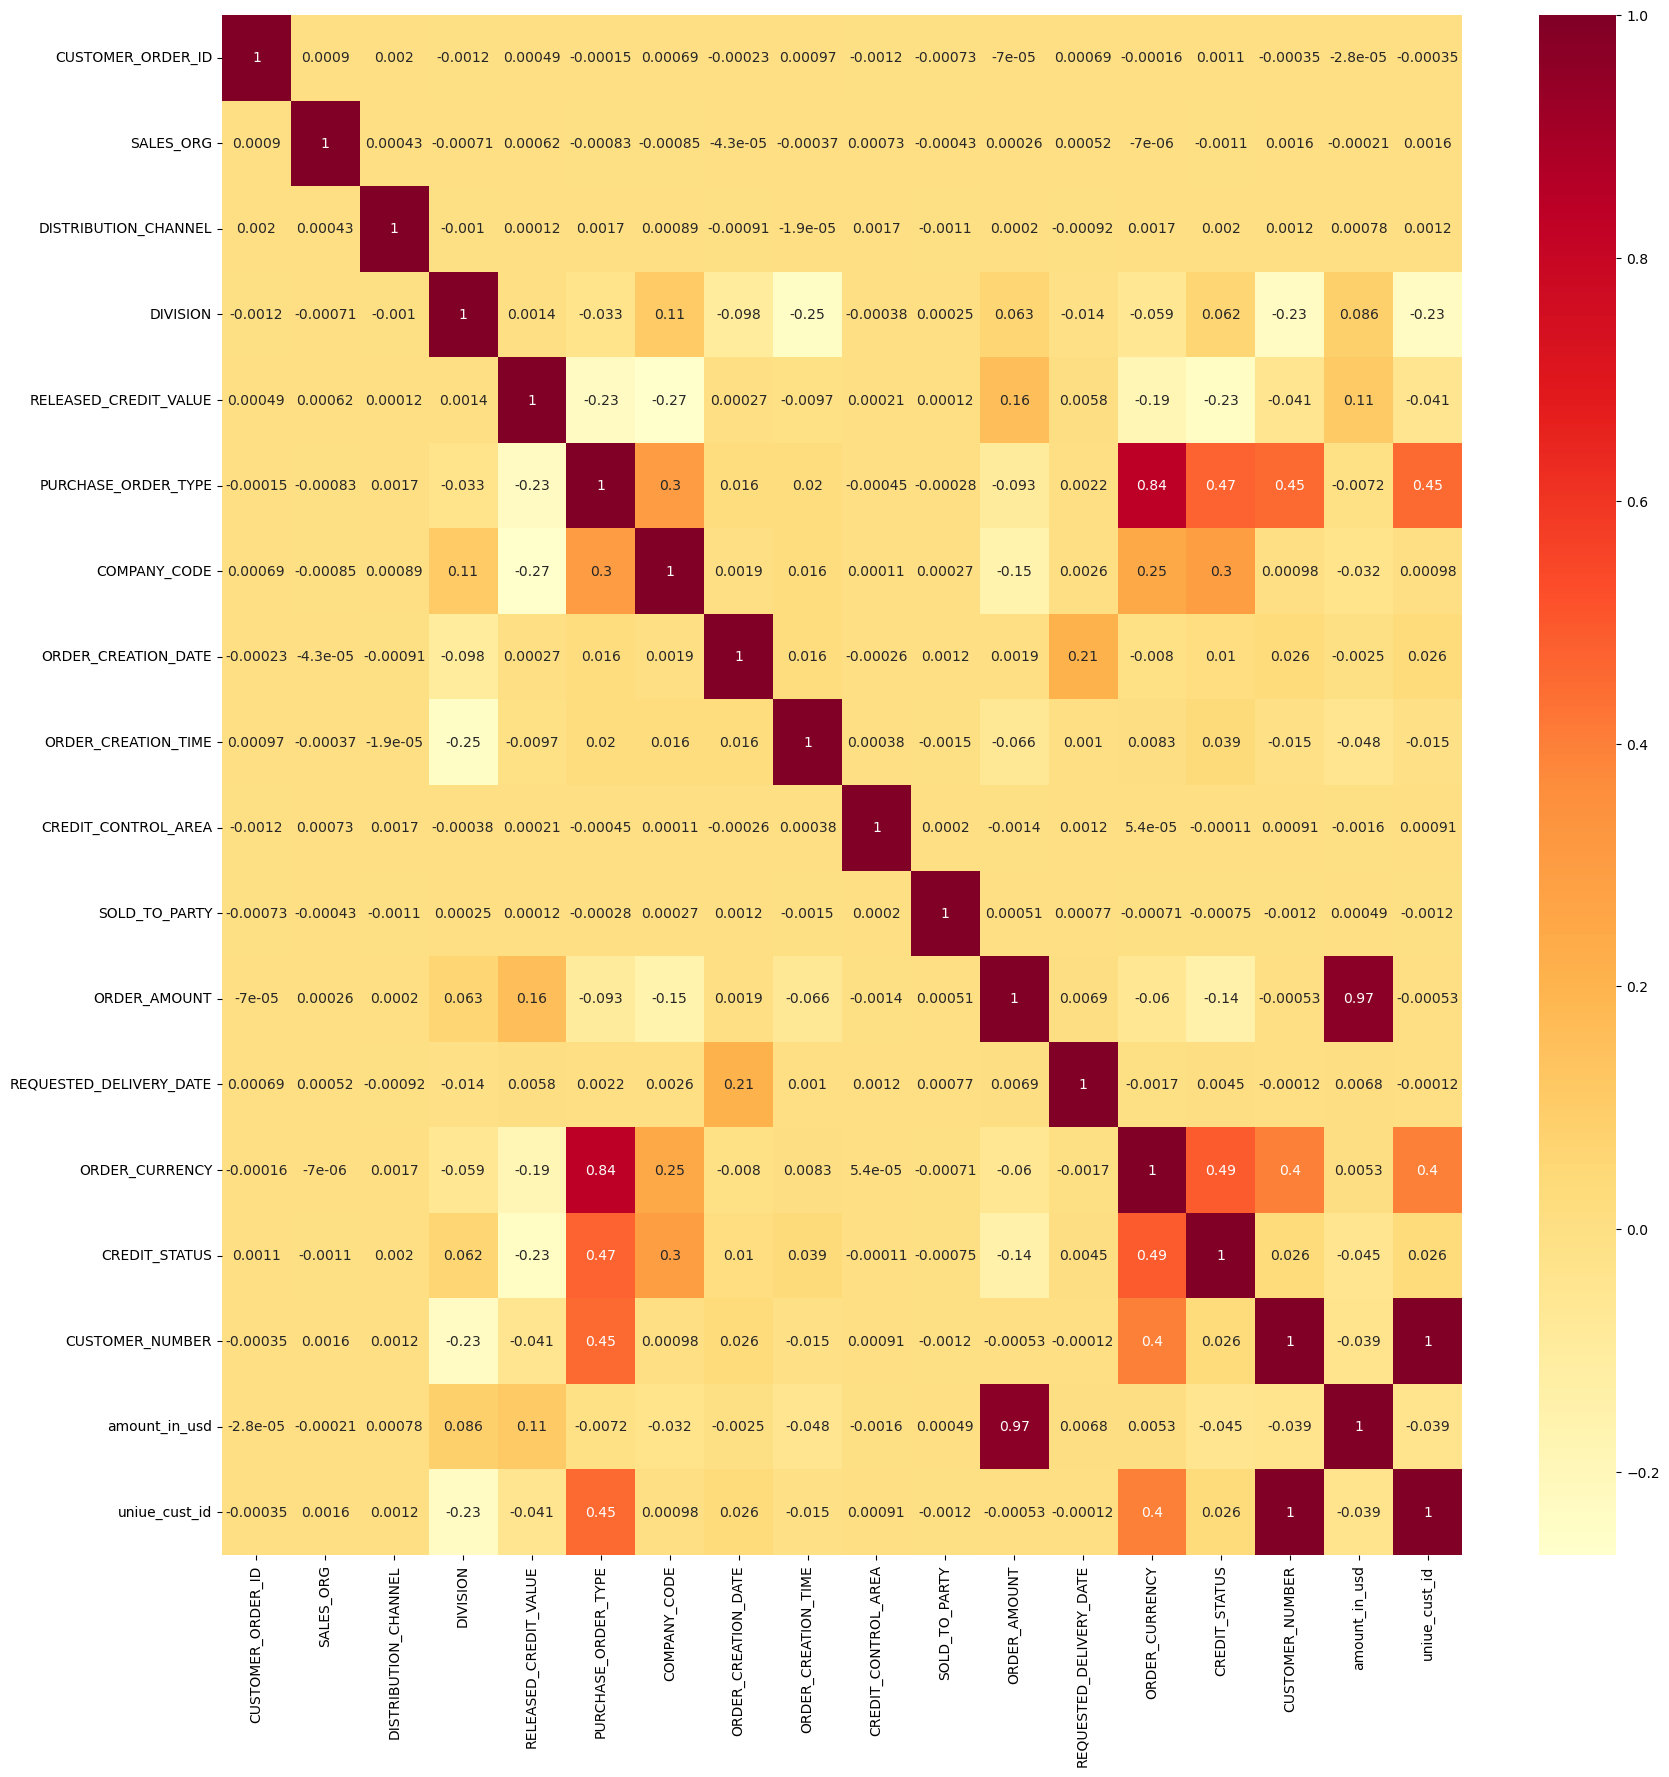

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.show()

6. Try to identify important or relevant columns for feature extraction

In [35]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.5)        # indices where correlation coefficient is greater than 0.5
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'amount_in_usd'), ('CUSTOMER_NUMBER', 'uniue_cust_id')]


# MILESTONE 4

1.  Modify the dataset to pass into any type of machine learning models. 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

datasetTrain = "FinalNew.csv"
df = pd.read_csv(datasetTrain)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43012,SR02,756141537,954.61,1970-01-01 00:00:00.020220113,EUR,NaN,12311807,1030.9788,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43114,NR03,798847812,787.36,1970-01-01 00:00:00.020220111,EUR,NaN,12311807,850.3488,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,1970-01-01 00:00:00.020220101,110019,NR01,960984659,67493.46,1970-01-01 00:00:00.020220112,EUR,93.0,12118758,72892.9368,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,1970-01-01 00:00:00.020220101,153013,SR02,925857642,1405.54,1970-01-01 00:00:00.020220106,EUR,93.0,1210499770,1517.9832,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,1970-01-01 00:00:00.020220101,160020,SR01,947942786,0.00,1970-01-01 00:00:00.020220106,EUR,64.0,1210351400,0.0000,1210354690


In [37]:
# Creating a list of column names with 'object' data type, representing categorical variables
cat_cols = [col for col in df.columns if df[col].dtype == 'object']


# Creating a list of column names with data types other than 'object', representing numerical variables
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [38]:
# Handle extreme values, zero values, and infinite values in numeric columns
for col in num_cols:
    
    max_val = df[col].max()
    min_val = df[col].min()
    if max_val > 1e9 or min_val < -1e9:
        
        df[col] = df[col].replace([max_val, min_val], np.nan)             # Replacing extreme values with NaN
        
    if 0 in df[col].values:                                  # handling zero values
        df[col] = df[col].replace(0, np.nan)
        
    
    if np.isinf(df[col].max()) or np.isinf(df[col].min()):            # Handling infinite values
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)


le = LabelEncoder()                                # Appling LabelEncoder to categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


scaler = StandardScaler()                            # Appling StandardScaler to numeric columns
for col in num_cols:
    
    df[col].fillna(df[col].mean(), inplace=True)                    # Replacing NaN values with the mean
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    
    
df.rename(columns={'amount_in_usd': 'target'}, inplace=True)            # Renaming the 'amount_in_usd' column to 'target'
df.dropna(inplace=True) 

X = df.drop(columns=['target'])                         # Creating the feature matrix X by dropping the 'target' column
y = df['target']                                        # Creating the target variable y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=355)

2. Try different machine learning models like - 
      -Linear Regression
      -Support Vector Machine 
      -Decision Tree
      -Random Forest 
      -AdaBoost
      -Xgboost etc. 



In [39]:
regressor_models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('XGBoost', XGBRegressor()),
    ('Random Forest', RandomForestRegressor())
    #('Support Vector Machine', SVR())
]

3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [40]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('------------------------------------')
    print(f'{model.__class__.__name__}\n\nTest MSE: {mse}')
    print(f'Test RMSE: {rmse}')
    print(f'Test R2: {r2}\n')
    
    return model.__class__.__name__, model, mse, rmse, r2

In [41]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [42]:
regressor_models[20:]

[]

In [43]:
for model in regressor_models[:10]:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

------------------------------------
LinearRegression

Test MSE: 1.0178774426756432
Test RMSE: 1.0088991241326573
Test R2: 0.03296487957034422

------------------------------------
DecisionTreeRegressor

Test MSE: 0.055180914649990906
Test RMSE: 0.23490618265595076
Test R2: 0.947575336473021

------------------------------------
AdaBoostRegressor

Test MSE: 0.18237176113034945
Test RMSE: 0.4270500686457613
Test R2: 0.8267375908006493

------------------------------------
XGBRegressor

Test MSE: 0.02385200572766259
Test RMSE: 0.15444094576135756
Test R2: 0.9773393865859653

------------------------------------
RandomForestRegressor

Test MSE: 0.04775783772487925
Test RMSE: 0.21853566693992826
Test R2: 0.9546276354898501



4. Compare the accuracies of all the models 

In [44]:
df_compare

,Regressor,Model,MSE,RMSE,R2
0,LinearRegression(),LinearRegression,1.017877,1.008899,0.032965
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.055181,0.234906,0.947575
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,0.182372,0.427050,0.826738
0,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.023852,0.154441,0.977339
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.047758,0.218536,0.954628


In [45]:
df_compare = df_compare.sort_values(by=['MSE'], ascending=True)  # Sorting df_compare DataFrame by MSE in ascending order

# Selecting top 3 models with the lowest MSE and appending them to the best_model DataFrame
best_model = pd.concat([best_model, df_compare.sort_values(by=['MSE'], ascending=True).head(3)])  
df_compare.head()  


,Regressor,Model,MSE,RMSE,R2
0,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.023852,0.154441,0.977339
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.047758,0.218536,0.954628
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.055181,0.234906,0.947575
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,0.182372,0.427050,0.826738
0,LinearRegression(),LinearRegression,1.017877,1.008899,0.032965


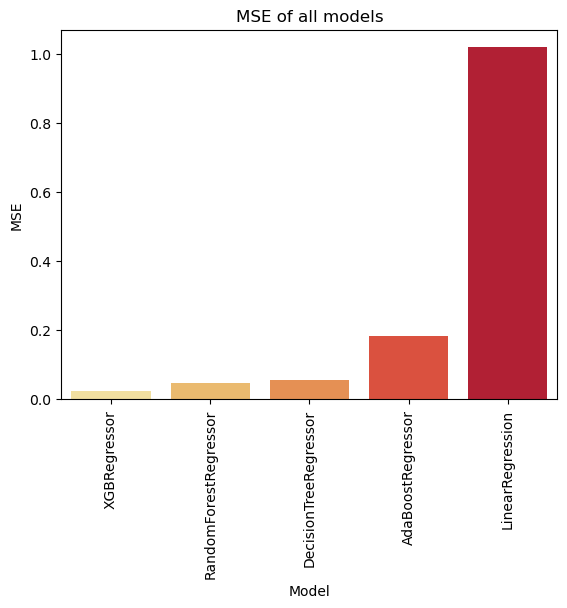

In [46]:
import seaborn as sns
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [47]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)# Sorting df_compare DataFrame by MSE in ascending order

# Selecting top 3 models with the lowest MSE and appending them to the best_model DataFrame
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(3)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.023852,0.154441,0.977339
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.047758,0.218536,0.954628
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.055181,0.234906,0.947575
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,0.182372,0.427050,0.826738
0,LinearRegression(),LinearRegression,1.017877,1.008899,0.032965


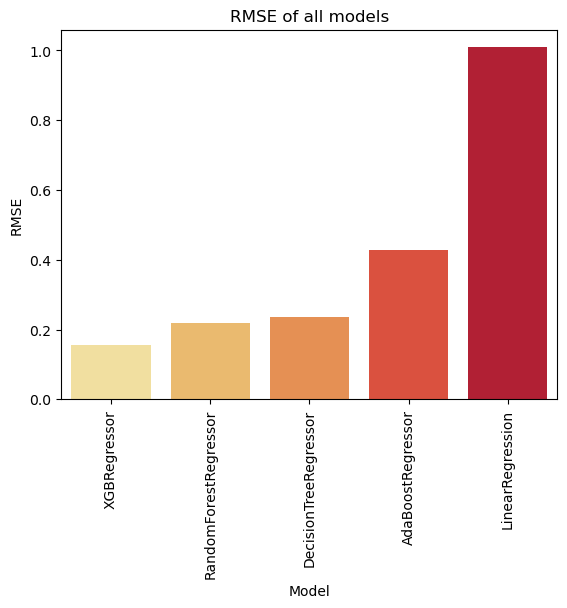

In [48]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [49]:
df_compare = df_compare[df_compare['R2'] > 0]  # Filtering df_compare DataFrame to include only rows where R2 score is > 0
df_compare = df_compare.sort_values(by=['R2'], ascending=False)  # Sorting df_compare DataFrame by R2 score

# Selecting top 3 models with the lowest MSE from the sorted df_compare DataFrame
best_model = pd.concat([best_model, df_compare.sort_values(by=['MSE'], ascending=True).head(3)])  
df_compare.head()  # Displaying the first few rows of the df_compare DataFrame


,Regressor,Model,MSE,RMSE,R2
0,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.023852,0.154441,0.977339
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.047758,0.218536,0.954628
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.055181,0.234906,0.947575
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,0.182372,0.427050,0.826738
0,LinearRegression(),LinearRegression,1.017877,1.008899,0.032965


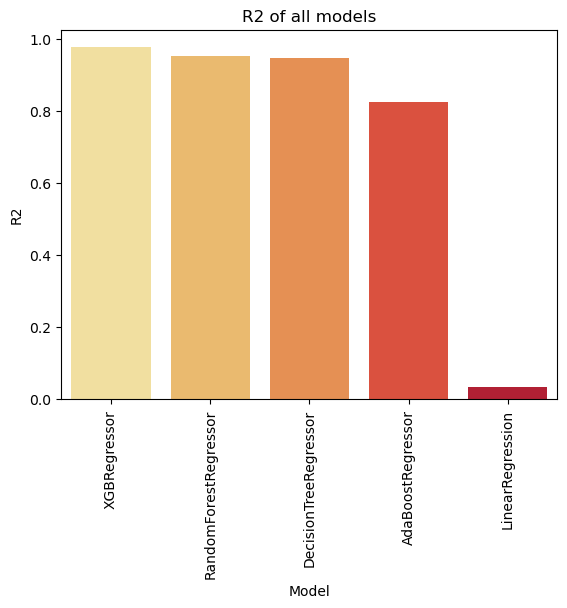

In [50]:
sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

5. Select the best possible model

In [51]:
best_model = best_model.drop_duplicates()                      # Removing duplicate rows from the best_model DataFrame
best_model 

,Regressor,Model,MSE,RMSE,R2
0,"XGBRegressor(base_score=None, booster=None, ca...",XGBRegressor,0.023852,0.154441,0.977339
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.047758,0.218536,0.954628
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.055181,0.234906,0.947575


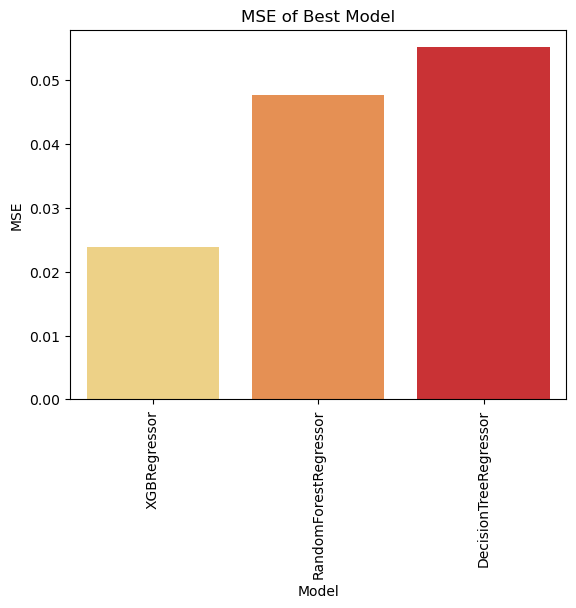

In [52]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

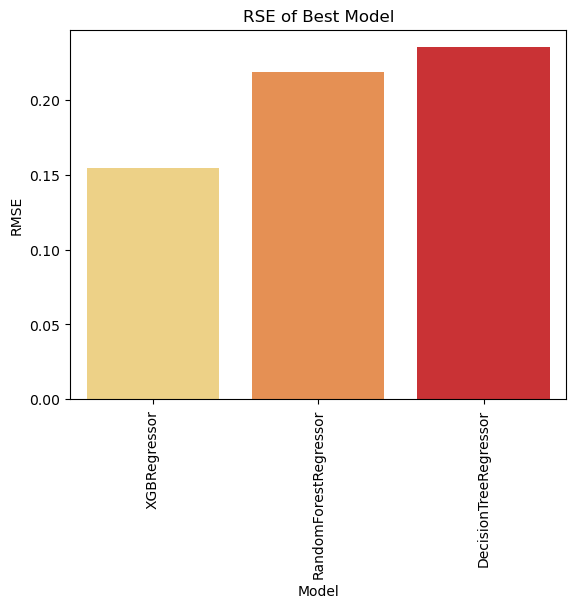

In [53]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

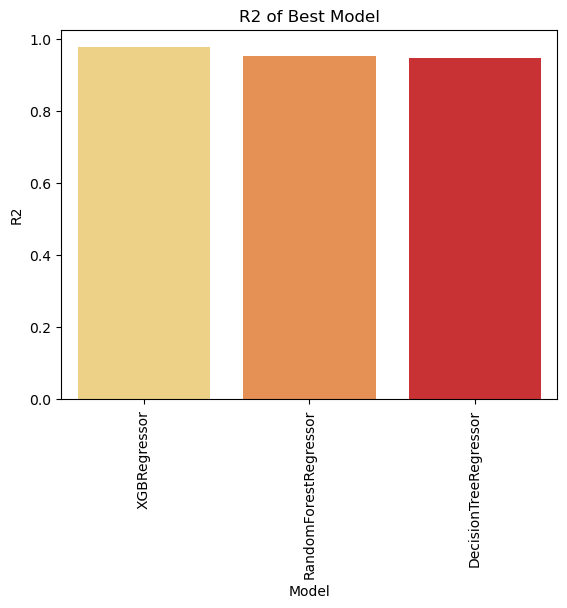

In [54]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [55]:
bestModel = set()  

best_model = best_model.sort_values(by=['MSE'], ascending=True)  # Sorting the best_model DataFrame by MSE

# Iterating the top 3 rows of the best_model DataFrame with the lowest MSE
for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor']) 

best_model = best_model.sort_values(by=['RMSE'], ascending=True)  # Sorting the best_model DataFrame by RMSE

# Iterating the top 3 rows of the best_model DataFrame with the lowest RMSE
for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor']) 

best_model = best_model.sort_values(by=['R2'], ascending=False)  # Sorting the best_model DataFrame by R2

# Iterating the top 3 rows of the best_model DataFrame with the highest R2
for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [56]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv=5, n_jobs=-1, verbose=5)
    
    grid_search.fit(X_train, y_train)               # Performing grid search to find the best hyperparameters
    
    print(grid_search.best_params_)                   # Displaying the best hyperparameters found
    print(grid_search.best_score_)                    # Displaying the best score achieved
    print(grid_search.best_estimator_)                # Displaying the best model
    y_pred = grid_search.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)            # Calculating the MSE
    rmse = np.sqrt(mse)                                 # Calculating the RMSE
    r2 = r2_score(y_test, y_pred)                       # Calculating the R2
    print('MSE: ', mse)  
    print('RMSE: ', rmse)  
    print('R2: ', r2)  
    return grid_search.best_estimator_, mse, rmse, r2


7. Come up with the best possible model accuracy.

In [ ]:
for model in bestModel:
    try:
        print(model)  
        hyperparam(model, X_train, y_train, X_test, y_test)  # Calling the hyperparam function for the model
    except:
        print('')  


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
